In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


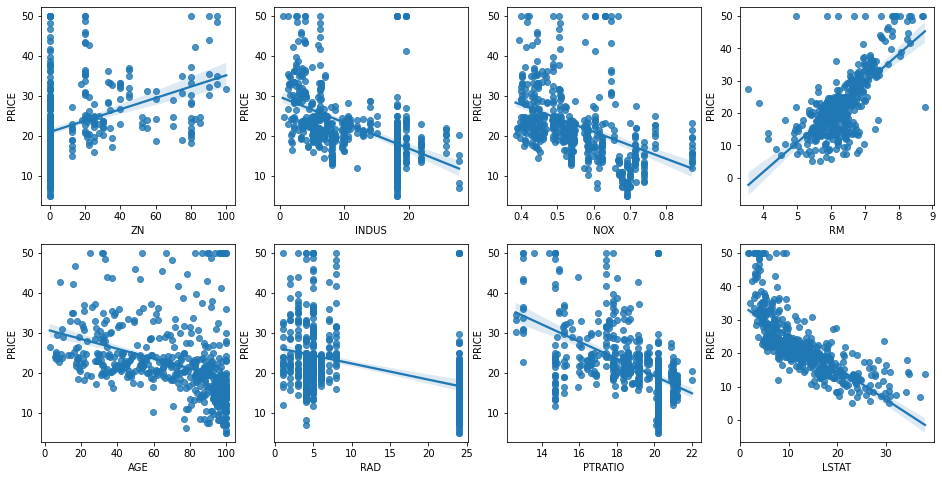

In [9]:
lm_features = ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']
fig, axes = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axes[row][col])

In [11]:
Y = data.target
X = data.data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [13]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_preds = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_preds)
rmse = np.sqrt(mse)
print('mse: {}, rmse: {}, r2: {}'.format(mse, rmse, r2_score(Y_test, Y_preds)))

mse: 17.296915907902058, rmse: 4.158956107955704, r2: 0.7572263323138935


In [14]:
lr.intercept_

40.99559517216412

In [15]:
np.round(lr.coef_, 1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [19]:
pd.Series(data=np.round(lr.coef_, 1), index=data.feature_names).sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [21]:
X = data.data
Y = data.target
lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X, Y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 개별 neg MSE: {}'.format(np.round(neg_mse_scores), 2))
print('5 folds 개별 RMSE: {}'.format(np.round(rmse_scores), 2))
print('5 folds 평균 RMSE: {}'.format(avg_rmse))

5 folds 개별 neg MSE: [-12. -26. -33. -81. -33.]
5 folds 개별 RMSE: [4. 5. 6. 9. 6.]
5 folds 평균 RMSE: 5.8286589462158345


In [25]:
X = np.arange(4).reshape(2, 2)
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [26]:
def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0] ** 2  + 4 * X[:, 1] ** 3
    return y

In [27]:
X = np.arange(4).reshape(2, 2)
print(X)
y = polynomial_func(X)
print(y)

[[0 1]
 [2 3]]
[  5 125]


In [28]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print(poly_ftr)

[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [30]:
model = LinearRegression()
model.fit(poly_ftr, y)
np.round(model.coef_, 2)

array([0.  , 0.18, 0.18, 0.36, 0.54, 0.72, 0.72, 1.08, 1.62, 2.34])

In [31]:
model.coef_.shape

(10,)

In [40]:
def true_func(X):
    return np.cos(1.5 * np.pi * X)
np.random.seed(0)

In [41]:
n_sample = 30
X = np.sort(np.random.rand(n_sample))
Y = true_func(X) + np.random.randn(n_sample) * 0.1

Degree 1 회귀계수: [-1.61], MSE: 0.40772896250986834
Degree 4 회귀계수: [  0.47 -17.79  23.59  -7.26], MSE: 0.04320874987231747
Degree 15 회귀계수: [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08], MSE: 182815433.47648773


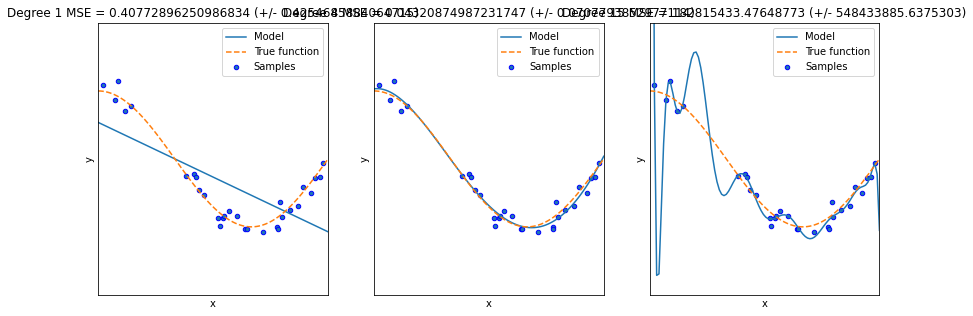

In [44]:
plt.figure(figsize=(14, 5))
degrees=[1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
        ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), Y)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), Y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('Degree {} 회귀계수: {}, MSE: {}'.format(degrees[i], np.round(coefficients, 2),  -1 * np.mean(scores)))

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    plt.plot(X_test, true_func(X_test), '--', label='True function')
    plt.scatter(X, Y, edgecolor='b', s=20, label='Samples')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    plt.title('Degree {} MSE = {} (+/- {})'.format(degrees[i], -scores.mean(), scores.std()))
plt.show()



In [54]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, data.data, data.target, scoring='neg_mean_squared_error', cv=5)

In [55]:
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [56]:
print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
[3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
5.518166280868972


In [57]:
alphas = [0, 0.1, 1, 10, 10]
for a in alphas:
    ridge = Ridge(alpha=a)
    neg_mse_scores = cross_val_score(ridge, data.data, data.target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(neg_mse_scores)
    print(rmse_scores)
    print(avg_rmse)

[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
[3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
5.82865894621581
[-12.31966805 -25.19800734 -32.43466024 -80.70282254 -32.88006851]
[3.50993847 5.01976168 5.69514357 8.98347497 5.73411445]
5.788486627032412
[-11.7110334  -23.58316804 -29.69339407 -80.22988232 -31.11617767]
[3.42213872 4.85625041 5.44916453 8.9571135  5.57818767]
5.6525709656135446
[-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
[3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
5.518166280868972
[-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
[3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
5.518166280868972


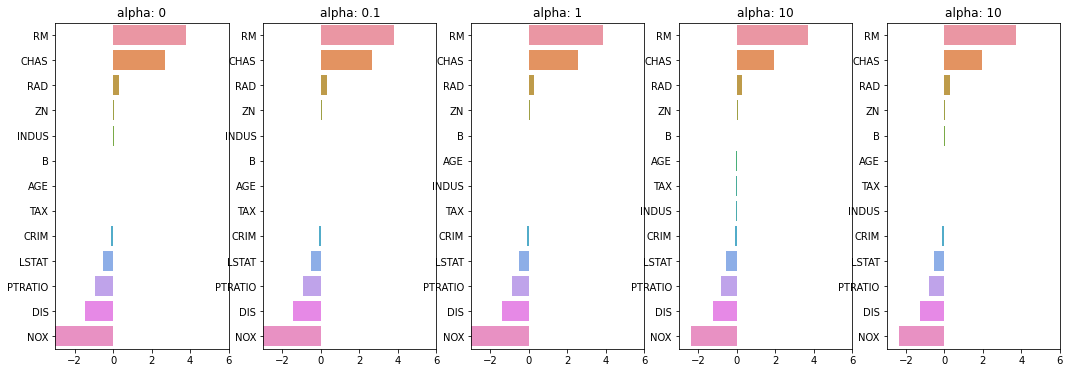

In [58]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, a in enumerate(alphas):
    ridge = Ridge(alpha=a)
    ridge.fit(data.data, data.target)
    coeff = pd.Series(data=ridge.coef_, index=data.feature_names)
    colname = 'alpha: '+str(a)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axes[pos].set_title(colname)
    axes[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axes[pos])
plt.show()


In [86]:
def get_linear_reg_eval(model_name, params, X, Y, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('####', model_name, '####')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print('alpha: {:}, avg_rmse: {:.3f}'.format(param, avg_rmse))
        model.fit(X, Y)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X.columns)
            colname = 'alpha: '+str(param)
            coeff_df[colname] = coeff
    return coeff_df


In [83]:
X_df = pd.DataFrame(data.data, columns=data.feature_names)
X_df['PRICE'] = data.target
Y = X_df.iloc[:, -1]
X = X_df.drop(['PRICE'], axis=1)

In [84]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
get_linear_reg_eval('Lasso', lasso_alphas, X, Y).sort_values(by='alpha: 0.07', ascending=False)

#### Lasso ####
alpha: 0.07, avg_rmse: 5.612
alpha: 0.1, avg_rmse: 5.615
alpha: 0.5, avg_rmse: 5.669
alpha: 1, avg_rmse: 5.776
alpha: 3, avg_rmse: 6.189


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [88]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
get_linear_reg_eval('ElasticNet', elastic_alphas, X, Y).sort_values(by='alpha: 0.07', ascending=False)

#### ElasticNet ####
alpha: 0.07, avg_rmse: 5.542
alpha: 0.1, avg_rmse: 5.526
alpha: 0.5, avg_rmse: 5.467
alpha: 1, avg_rmse: 5.597
alpha: 3, avg_rmse: 6.068


,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [91]:
def get_scaled_data(method=None, input_data=None, p_degree=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [95]:
alphas = [0.1, 1, 10, 100]
scaled_methods = [(None, None), ('Standard', None), ('Standard', 2),
    ('MinMax', None), ('MinMax', 2), ('Log', None)]
for m in scaled_methods:
    X_data_scaled = get_scaled_data(method=m[0], input_data=X, p_degree=m[1])
    print('\n유형: {}, Polynomial Degree: {}'.format(m[0], m[1]))
    get_linear_reg_eval('Ridge', params=alphas, X=X_data_scaled, Y=Y, verbose=False, return_coeff=False)


유형: None, Polynomial Degree: None
alpha: 0.1, avg_rmse: 5.788
alpha: 1, avg_rmse: 5.653
alpha: 10, avg_rmse: 5.518
alpha: 100, avg_rmse: 5.330

유형: Standard, Polynomial Degree: None
alpha: 0.1, avg_rmse: 5.826
alpha: 1, avg_rmse: 5.803
alpha: 10, avg_rmse: 5.637
alpha: 100, avg_rmse: 5.421

유형: Standard, Polynomial Degree: 2
alpha: 0.1, avg_rmse: 8.827
alpha: 1, avg_rmse: 6.871
alpha: 10, avg_rmse: 5.485
alpha: 100, avg_rmse: 4.634

유형: MinMax, Polynomial Degree: None
alpha: 0.1, avg_rmse: 5.764
alpha: 1, avg_rmse: 5.465
alpha: 10, avg_rmse: 5.754
alpha: 100, avg_rmse: 7.635

유형: MinMax, Polynomial Degree: 2
alpha: 0.1, avg_rmse: 5.298
alpha: 1, avg_rmse: 4.323
alpha: 10, avg_rmse: 5.185
alpha: 100, avg_rmse: 6.538

유형: Log, Polynomial Degree: None
alpha: 0.1, avg_rmse: 4.770
alpha: 1, avg_rmse: 4.676
alpha: 10, avg_rmse: 4.836
alpha: 100, avg_rmse: 6.241
